# FINAL PROJECT 2 (CLASSIFICATION)-PHYTON FOR DATA SCIENCE
1. Krisna Winar Setiawan - PYTN-KS14-016
2. Jaelani - PYTN_KS14-002

# Projects Overview
Dataset ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia,
kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka
besok harinya disana hujan 1mm atau lebih.
Attribute Information:
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

# IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

# PREPARING DATA

In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d jsphyg/weather-dataset-rattle-package

  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 95.3MB/s]


In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/weather-dataset-rattle-package.zip', 'r')
zip_file.extractall('/tmp/')

# LOAD DATA

In [ ]:
df = pd.read_csv('/tmp/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

dari df.info diatas kita mendapatkan informasi yang cukup mengenai kumpulan data yang ada

# DATA CLEANING

mengubah semua nama kolom menjadi huruf Kecil

In [ ]:
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

mengubah format tanggal menjadi datetime

In [ ]:
df['date'] = pd.to_datetime(df['date']) # parse as datatime

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

df[['date', 'Year', 'Month', 'Day']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           145460 non-null  datetime64[ns]
 1   location       145460 non-null  object        
 2   mintemp        143975 non-null  float64       
 3   maxtemp        144199 non-null  float64       
 4   rainfall       142199 non-null  float64       
 5   evaporation    82670 non-null   float64       
 6   sunshine       75625 non-null   float64       
 7   windgustdir    135134 non-null  object        
 8   windgustspeed  135197 non-null  float64       
 9   winddir9am     134894 non-null  object        
 10  winddir3pm     141232 non-null  object        
 11  windspeed9am   143693 non-null  float64       
 12  windspeed3pm   142398 non-null  float64       
 13  humidity9am    142806 non-null  float64       
 14  humidity3pm    140953 non-null  float64       
 15  

menghapus kolom date

In [ ]:
df.drop('date', axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       145460 non-null  object 
 1   mintemp        143975 non-null  float64
 2   maxtemp        144199 non-null  float64
 3   rainfall       142199 non-null  float64
 4   evaporation    82670 non-null   float64
 5   sunshine       75625 non-null   float64
 6   windgustdir    135134 non-null  object 
 7   windgustspeed  135197 non-null  float64
 8   winddir9am     134894 non-null  object 
 9   winddir3pm     141232 non-null  object 
 10  windspeed9am   143693 non-null  float64
 11  windspeed3pm   142398 non-null  float64
 12  humidity9am    142806 non-null  float64
 13  humidity3pm    140953 non-null  float64
 14  pressure9am    130395 non-null  float64
 15  pressure3pm    130432 non-null  float64
 16  cloud9am       89572 non-null   float64
 17  cloud3pm       86102 non-null

membersihkan data null

In [ ]:
df.isnull().sum()

location             0
mintemp           1485
maxtemp           1261
rainfall          3261
evaporation      62790
sunshine         69835
windgustdir      10326
windgustspeed    10263
winddir9am       10566
winddir3pm        4228
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
cloud9am         55888
cloud3pm         59358
temp9am           1767
temp3pm           3609
raintoday         3261
raintomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

Melihat Missing value 

In [ ]:
missing_value = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

missing_value['% missing_values']= (missing_value/len(df)).round(2)*100
missing_value

,no.of missing values,% missing_values
location,0,0.0
mintemp,1485,1.0
maxtemp,1261,1.0
rainfall,3261,2.0
evaporation,62790,43.0
sunshine,69835,48.0
windgustdir,10326,7.0
windgustspeed,10263,7.0
winddir9am,10566,7.0
winddir3pm,4228,3.0


In [ ]:
df=df.drop(['sunshine','evaporation','cloud3pm','cloud9am'], axis=1)

In [ ]:
missing_value

,no.of missing values,% missing_values
location,0,0.0
mintemp,1485,1.0
maxtemp,1261,1.0
rainfall,3261,2.0
evaporation,62790,43.0
sunshine,69835,48.0
windgustdir,10326,7.0
windgustspeed,10263,7.0
winddir9am,10566,7.0
winddir3pm,4228,3.0


Menghapus Data Yang Memiliki Terlalu Banyak Missing Value

In [ ]:
df.dropna(how='all', subset=['raintomorrow'], inplace=True) 

Data yang tersisa harus disortir menjadi Data numerik dan kategoris

In [ ]:
# Extract numerical features
num_col = df.select_dtypes(include=np.number).columns.to_list()
len(num_col)

15

In [ ]:
df.head()

,location,mintemp,maxtemp,rainfall,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,...,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,raintomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


In [ ]:
# Exrtact categorical features
cat_col=df.select_dtypes(object).columns.tolist()
len(cat_col)

6

Numerical Features<br>
 Dari hasil missing value diatas kita tahu bahwa ada sejumlah nilai yang hilang untuk setiap fitur sehingga kita akan mengganti data yang missing dengan median atau rata-rata

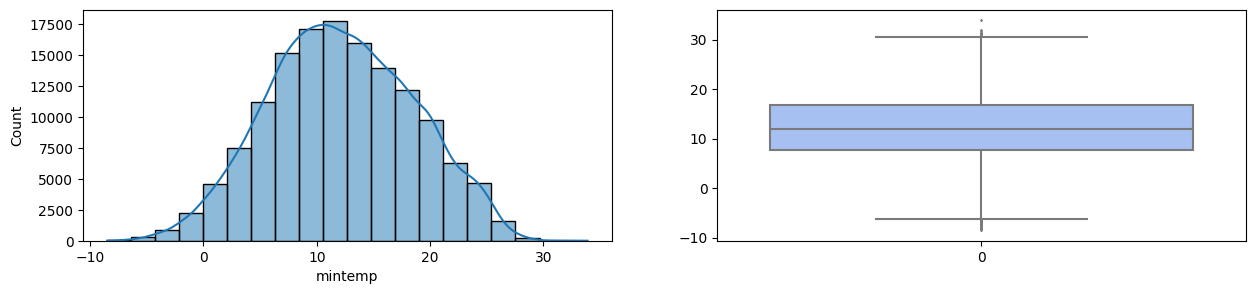

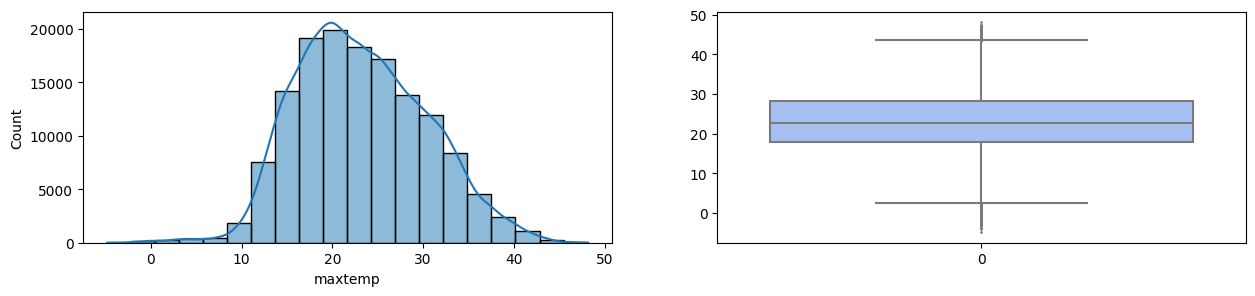

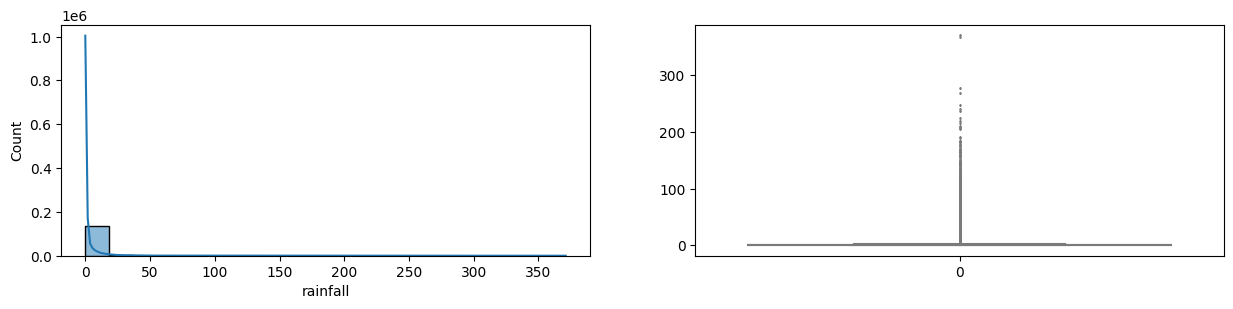

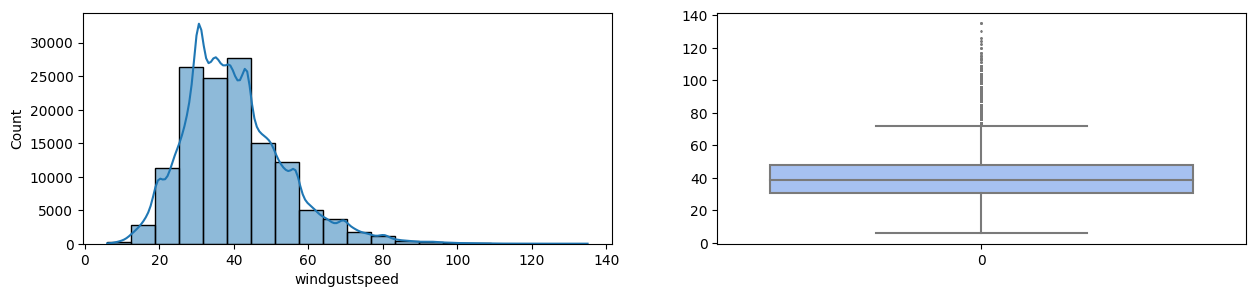

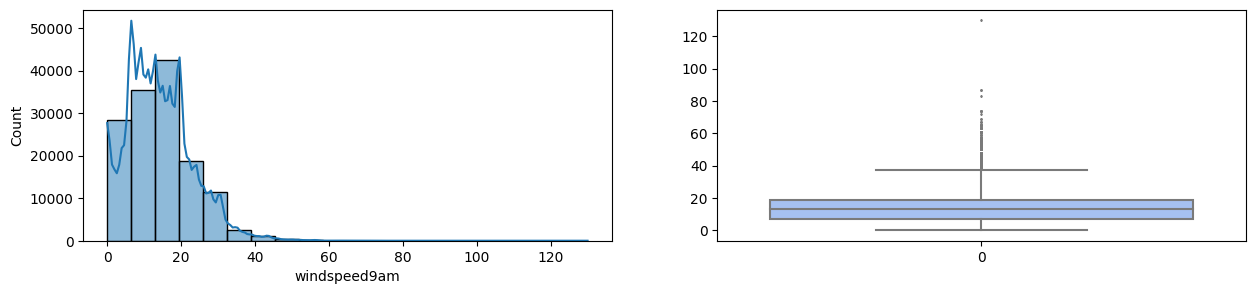

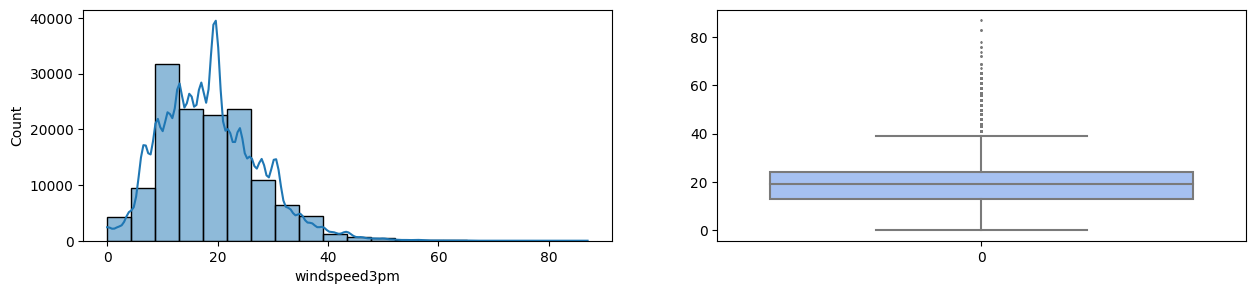

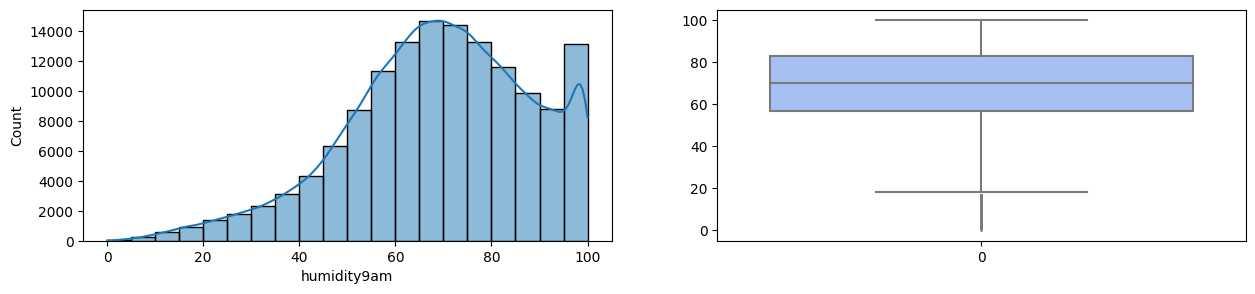

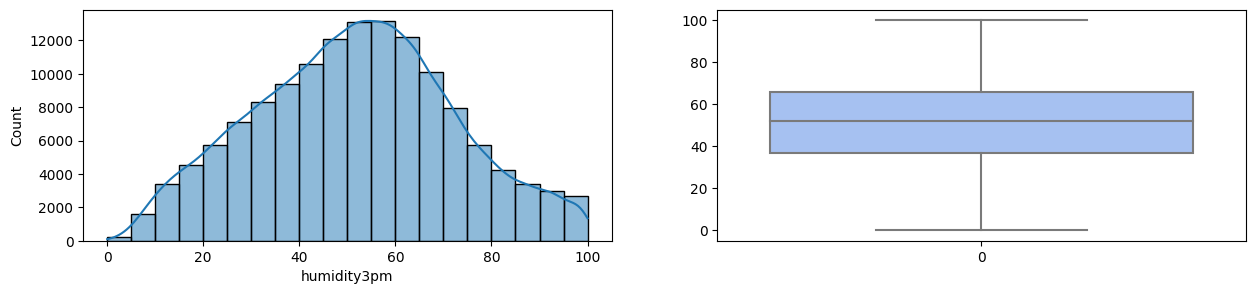

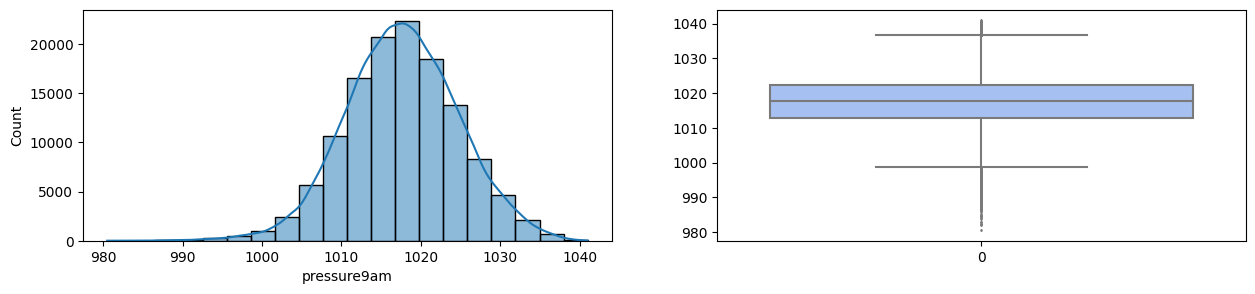

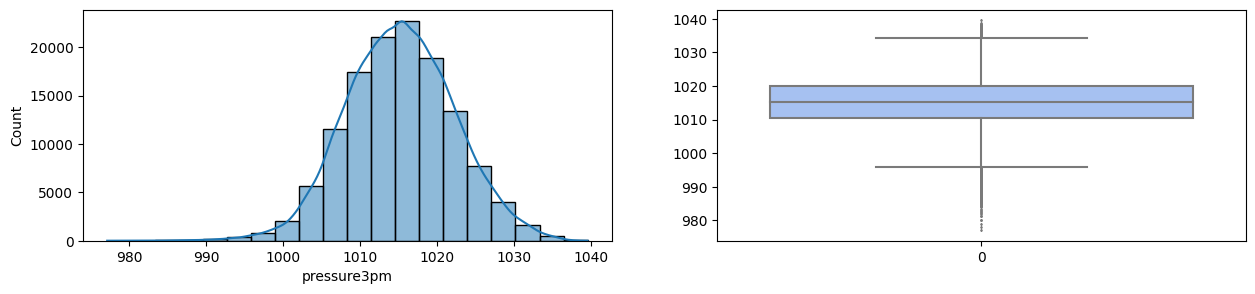

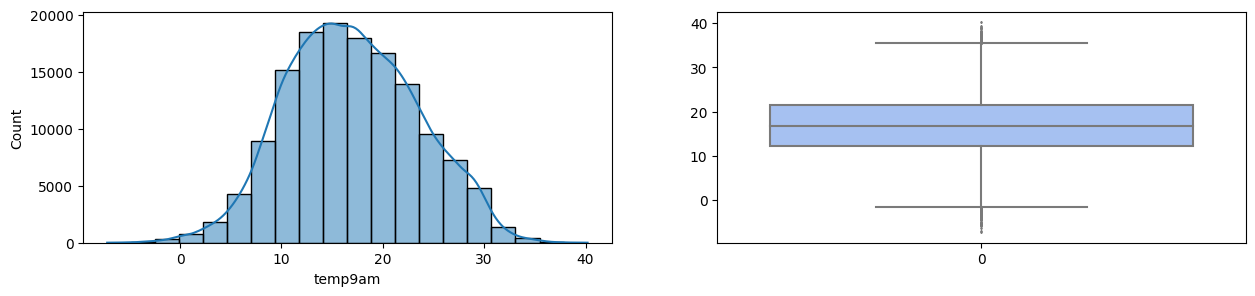

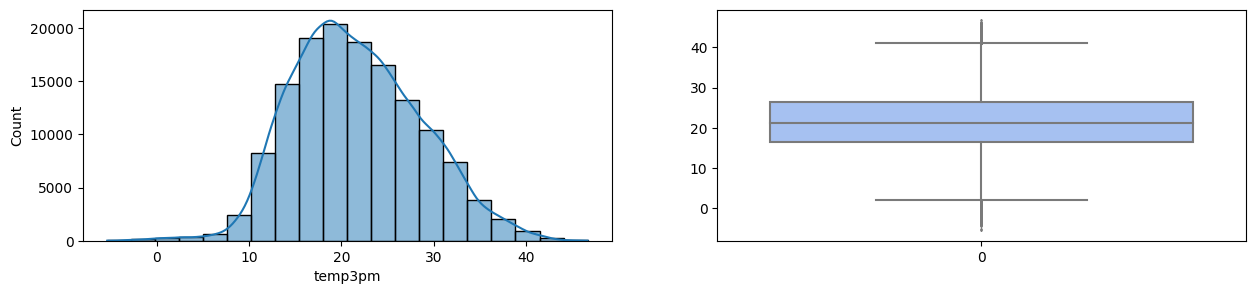

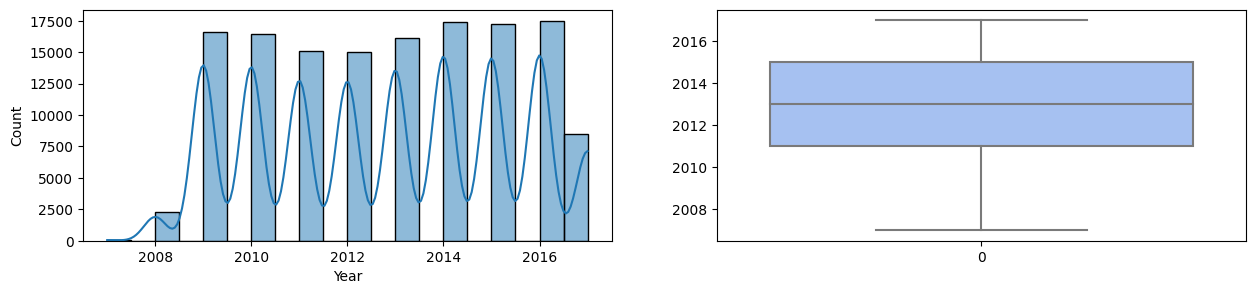

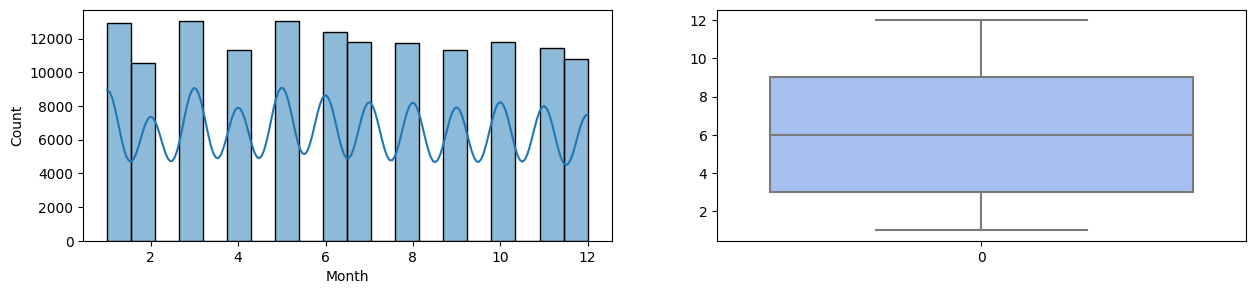

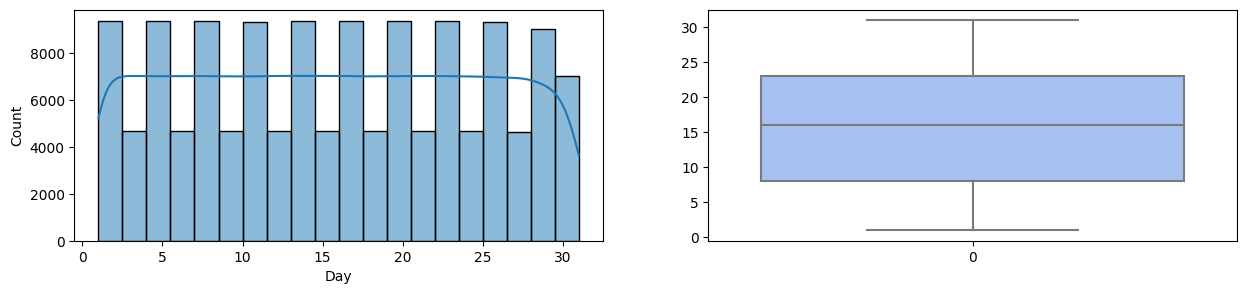

In [ ]:
for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

Data rainfal memiliki distorsi yang sangat besar, kita harus menghapus data ini untuk memudahkan melakukan analisis 

In [ ]:
# droping rainfall column in dataframe and Numerical columns
df=df.drop(['rainfall'], axis=1)
num_col
num_col.remove('rainfall')

Encoding and Explore Data

In [ ]:
# Impute missing values for numerical features
median_values = df[num_col].median()
df[num_col] = df[num_col].fillna(value=median_values)

In [ ]:
# Convert categorized values to numerical values
le = LabelEncoder()
df[cat_col] =df[cat_col].astype('str').apply(le.fit_transform)

In [ ]:
# Impute missing values for categorical features
mode_values=df[cat_col].mode()
df[cat_col] = df[cat_col].fillna(value=mode_values)

In [ ]:
df.isnull().sum()

location         0
mintemp          0
maxtemp          0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
temp9am          0
temp3pm          0
raintoday        0
raintomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
df.head()

,location,mintemp,maxtemp,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,raintomorrow,Year,Month,Day
0,2,13.4,22.9,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,5


Semua Data dalam Dataframe sudah diubah menjadi numerik

Check correlation between eachother by using heatmap

<Axes: >

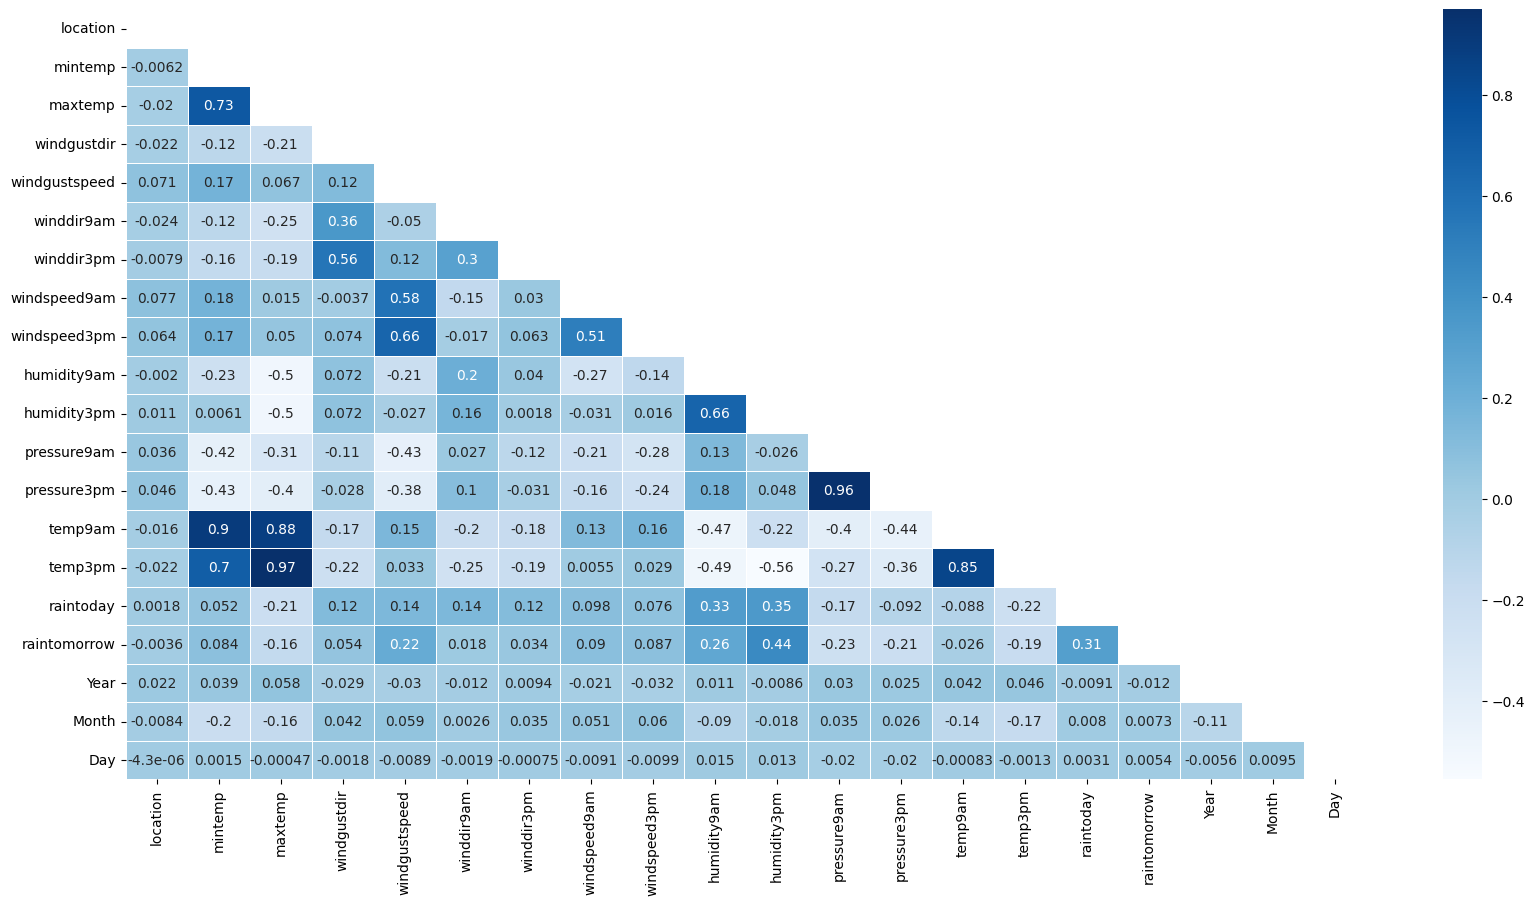

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), annot=True, cmap="Blues", mask=mask, linewidth=0.5)

In [ ]:
# lets drop the correlated variables
df=df.drop(columns=['temp9am','temp3pm','pressure9am'],axis=1)

In [ ]:
numcol_del=['temp9am','temp3pm','pressure9am']
num_cols = list(set(num_col) - set(numcol_del))
num_cols

['mintemp',
 'maxtemp',
 'windspeed9am',
 'windspeed3pm',
 'windgustspeed',
 'humidity9am',
 'humidity3pm',
 'pressure3pm',
 'Month',
 'Day',
 'Year']

Datascaling

In [ ]:
df.shape

(142193, 17)

In [ ]:
cat_col

['location',
 'windgustdir',
 'winddir9am',
 'winddir3pm',
 'raintoday',
 'raintomorrow']

In [ ]:
df.describe()

,location,mintemp,maxtemp,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure3pm,raintoday,raintomorrow,Year,Month,Day
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,23.740655,12.185565,23.225365,8.255885,39.920123,7.915755,7.974471,13.992489,18.644279,68.858235,51.495742,1015.252481,0.240989,0.224181,2012.758926,6.402544,15.715084
std,14.237503,6.388936,7.109617,4.953096,13.140632,4.911307,4.731493,8.851614,8.721688,18.932512,20.532227,6.681810,0.450212,0.417043,2.541256,3.426506,8.798150
min,0.000000,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,977.100000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,11.000000,7.600000,17.900000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1011.000000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,24.000000,12.000000,22.600000,9.000000,39.000000,8.000000,8.000000,13.000000,19.000000,70.000000,52.000000,1015.200000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,36.000000,16.800000,28.200000,13.000000,46.000000,12.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1019.400000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,48.000000,33.900000,48.100000,16.000000,135.000000,16.000000,16.000000,130.000000,87.000000,100.000000,100.000000,1039.600000,2.000000,1.000000,2017.000000,12.000000,31.000000


hasil nilai min dan maks dari setiap kolom dataframe tidak termasuk fitur kategorikal

Spliting and Testing data

In [ ]:
X = df.drop(['raintomorrow'], axis = 1)
y = df['raintomorrow']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

#Logistic Regresiion

In [ ]:
# Logistik Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
ypred = model_lr.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, ypred))
print(metrics.confusion_matrix(y_test, ypred))
print(metrics.classification_report(y_test, ypred))

Accuracy:  0.8367246471939612
[[31365  1736]
 [ 5229  4328]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33101
           1       0.71      0.45      0.55      9557

    accuracy                           0.84     42658
   macro avg       0.79      0.70      0.73     42658
weighted avg       0.82      0.84      0.82     42658



# Random Forest

In [ ]:
# Random Forest
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(X_train, y_train)

0.9999899532827649

In [ ]:
model.score(X_test, y_test)

0.8525247315861034

# K-NEAREST NEIGHBOR ALGORITHM

In [ ]:
# K-NEAREST NEIGHBOR ALGORITHM
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
pred_cv5= KNN.predict(X_test)
print("Accuracy score K-Nearest: ", metrics.accuracy_score(y_test, pred_cv5))
matrix5 = metrics.confusion_matrix(y_test, pred_cv5)
print(matrix5)
print(metrics.classification_report(y_test, pred_cv5))

Accuracy score K-Nearest:  0.8349664775657556
[[30964  2137]
 [ 4903  4654]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     33101
           1       0.69      0.49      0.57      9557

    accuracy                           0.83     42658
   macro avg       0.77      0.71      0.73     42658
weighted avg       0.82      0.83      0.82     42658



# SUPPORT VECTOR MACHINES (SVM)

In [ ]:
# SUPPORT VECTOR MACHINES (SVM)
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
ypred2=svm_model.predict(X_test)
print("Acc: ", metrics.accuracy_score(y_test, ypred2))
print(metrics.confusion_matrix(y_test, ypred2))
print(metrics.classification_report(y_test, ypred2))


Acc:  0.8189319705565193
[[32591   510]
 [ 7214  2343]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     33101
           1       0.82      0.25      0.38      9557

    accuracy                           0.82     42658
   macro avg       0.82      0.61      0.64     42658
weighted avg       0.82      0.82      0.78     42658



# DECISION TREE

In [ ]:
# DECISION TREE
dt = DecisionTreeClassifier()
# fit model into training data
dt.fit(X_train,y_train)
# get y prediction
y_pred_dt = dt.predict(X_test)

# print score
print("Accuracy score Decision Tree = ", metrics.accuracy_score(y_test,y_pred_dt))
print(metrics.classification_report(y_test,y_pred_dt))

# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred_dt))

Accuracy score Decision Tree =  0.7814243518214637
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     33101
           1       0.51      0.54      0.52      9557

    accuracy                           0.78     42658
   macro avg       0.69      0.69      0.69     42658
weighted avg       0.79      0.78      0.78     42658

[[28217  4884]
 [ 4440  5117]]


# KESIMPULAN
Untuk Hasil akhiir Classification algoritma Logistic Regression memiliki performa yang lebih baik dari yang algoritma yang lain seperti SVM, KNN, dan Random Forest. Hasil classification diatas dapat dilihat bahwa proses klasifikasi dengan dataset menghasilkan accuracy sebesar 0.84. 